# 7. Scipy

## 7.1 Introduction

## 7.2 Numerical Integration

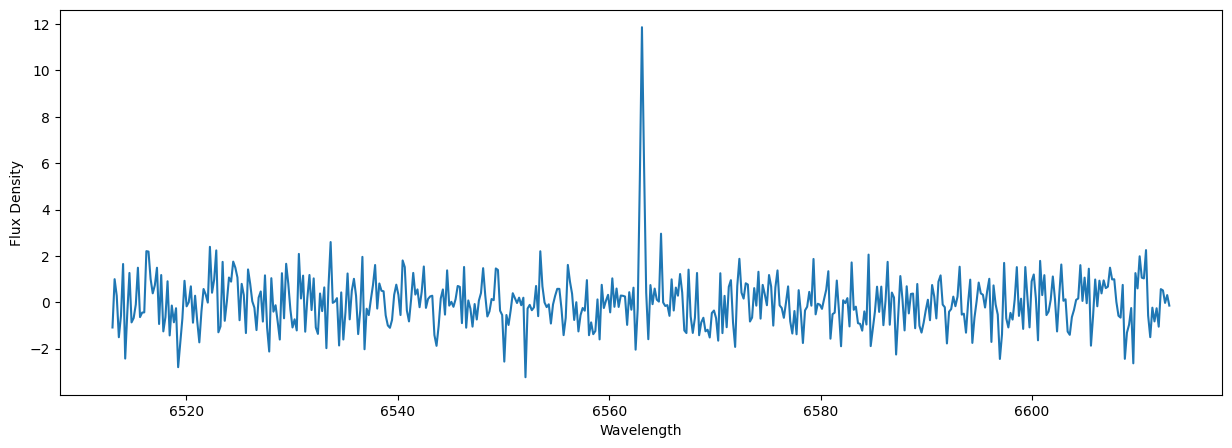

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 재현가능성 확보를 위해 seed 값을 설정 
np.random.seed(123)

wl = np.linspace(6500,6600,500)+13
flux = np.zeros_like(wl)
flux[250]=10
flux[249]=4.95; flux[251]=5.01
flux[248]=1.2; flux[252]=1.1
flux[247]=0.11; flux[253]=0.10
noise=np.random.normal(0,1,size=flux.size)
flux+=noise

fig,ax = plt.subplots(figsize=(15,5))
ax.plot(wl,flux)
ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux Density');

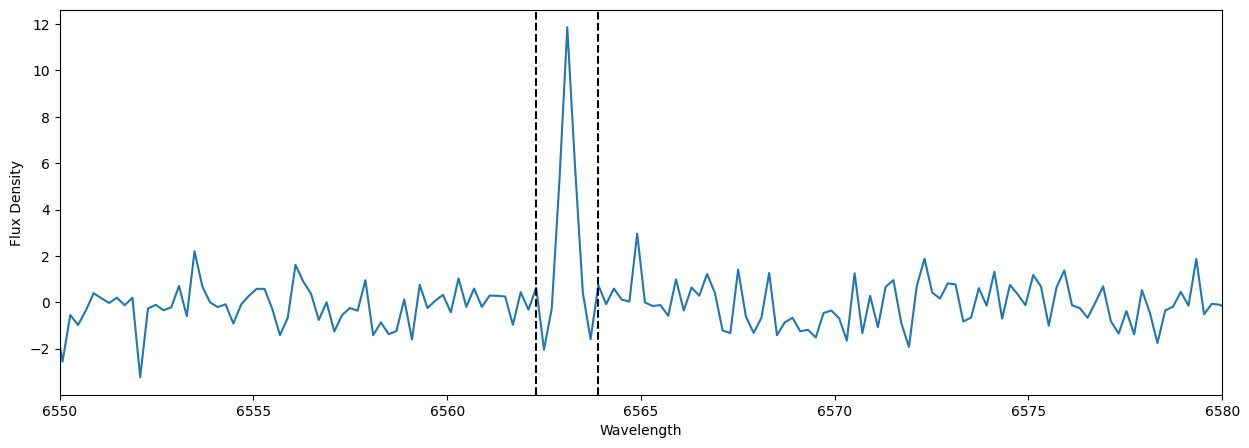

In [2]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(wl,flux)


ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux Density')
ax.axvline(wl[246], color ='k', linestyle = '--')
ax.axvline(wl[254], color ='k', linestyle = '--')
ax.set_xlim(6550,6580);

In [3]:
import scipy
print("scipy version:", scipy.__version__)

# scipy 버전에 따라 simps -> simpson으로 변경 
from scipy.integrate import trapezoid, simpson 
sub_wl = wl[246:254] #range chosen by eye
sub_fl = flux[246:254]

integral_trapz = trapezoid(sub_fl,sub_wl)
integral_simps = simpson(sub_fl, x=sub_wl)

print(f'Trapezoid Rule: {integral_trapz:.4f}')
print(f'Simpsons Rule: {integral_simps:.4f}')

scipy version: 1.14.1
Trapezoid Rule: 4.1384
Simpsons Rule: 3.8805


In [4]:
# 가우시안 함수 정의

def gauss(x,amp,loc,sigma):
    return amp * np.exp(-np.power(x-loc,2.0)/(2*np.power(sigma,2.0)))

**[참고]** 가우시안 함수 
$
f(x) = a \exp \left(-\frac{(x-b)^2}{2c^2}\right)
$

- a: amp 인자
- b: loc 인자
- c: sigma 인자

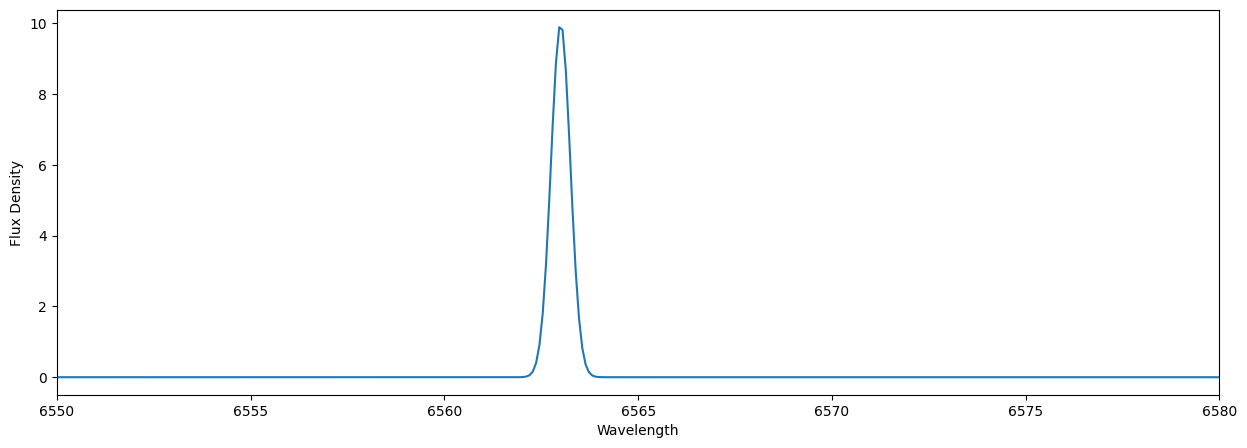

In [5]:
xx = np.linspace(6500,6585,1000)
gauss_test = gauss(xx, 10, 6563, 0.25)

# 평균이 6563, 표준편차 0.25, 계수가 10인 가우시안 그래프 생성 

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(xx,gauss_test)
ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux Density')
ax.set_xlim(6550,6580);

In [6]:
# 가우시안 함수 적분값 계산

from scipy.integrate import quad

res = quad(func=gauss,a=6560,b=6565,args=(10,6563,0.25))
print(f'Numerical Integral with Quad: {res[0]:.4f}')

Numerical Integral with Quad: 6.2666


$$
\int_{-\infty}^{\infty} a \exp \left(-\frac{(x-b)^2}{2c^2}\right) \, dx = a \sqrt{2\pi c^2}
$$


$$
\int_{-\infty}^{\infty} f(x) \, dx = \int_{-\infty}^{\infty} a \exp \left(-\frac{(x-\mu)^2}{2\sigma^2}\right) \, dx = a \sqrt{2\pi \sigma^2}
$$


In [7]:
true_integral = 10 * np.sqrt(2*np.pi*0.25**2)
true_integral

np.float64(6.2665706865775)

scipy **`quad()`** 함수의 결과와 일반해의 산술 결과와 비교

## 7.3 Optimization (fitting)

In [8]:
from scipy.optimize import curve_fit

res = curve_fit(f=gauss, xdata=wl, ydata=flux, p0=[10,6563,0.25])
res

(array([1.19943390e+01, 6.56310761e+03, 1.58678420e-01]),
 array([[ 9.75912790e-01,  2.41277401e-04, -7.40833820e-03],
        [ 2.41277401e-04,  2.61347435e-04, -5.33470361e-06],
        [-7.40833820e-03, -5.33470361e-06,  2.06128551e-04]]))

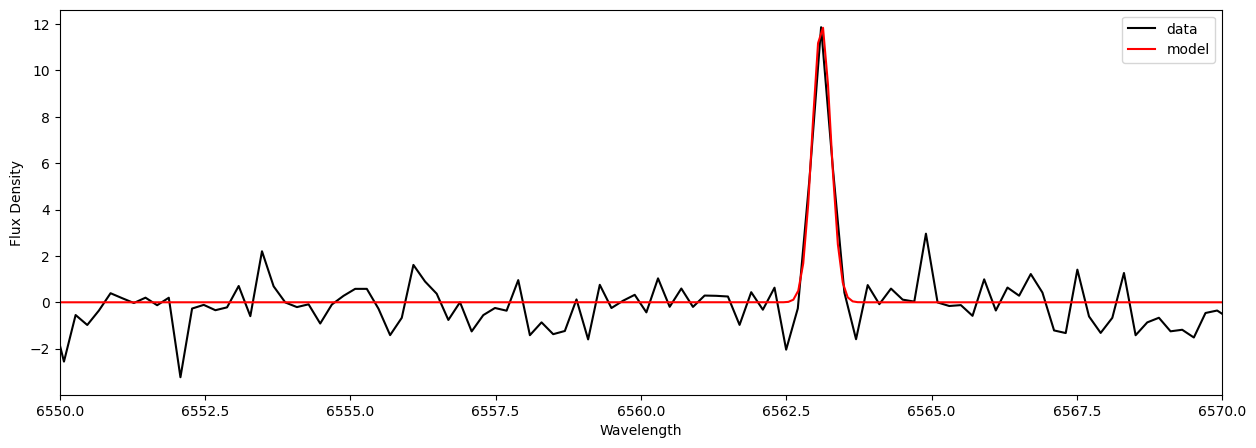

In [9]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(wl,flux,label='data',color='k')

params = res[0]
ax.plot(xx,gauss(xx, *params), label='model',color='r')
ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux Density')
ax.legend()
ax.set_xlim(6550,6570);

### Excercise 7.1 An SDSS Spectrum

In [10]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.sdss import SDSS
coord = SkyCoord.from_name('J140404.9+005953.3')
radius = 0.5 * u.arcmin  # 반경 0.1도

xid = SDSS.query_region(coord, spectro=True, radius=radius)

In [11]:
spectra = SDSS.get_spectra(matches = xid)[0]
spec = spectra[1].data

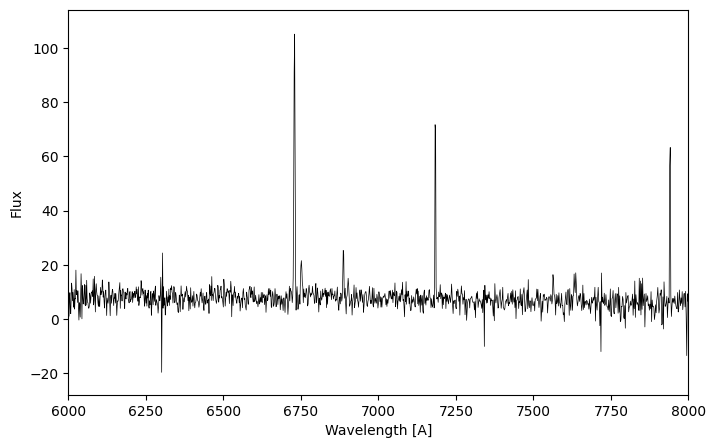

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(10**spec['loglam'], spec['flux'], lw = 0.5, color = 'k')
ax.set_xlabel('Wavelength [A]')
ax.set_ylabel('Flux')
# X축의 범위를 6000에서 8000으로 설정
ax.set_xlim(6000, 8000)
plt.show()

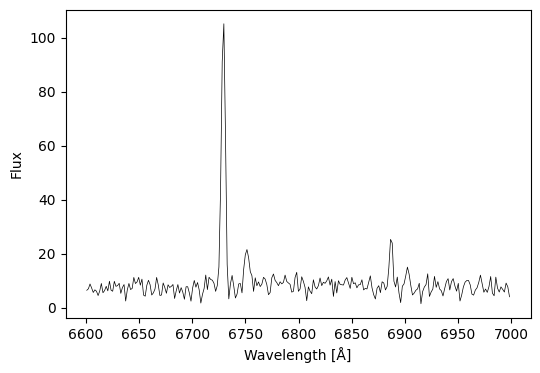

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 파장 데이터 생성
wavelength = 10**spec['loglam']
flux = spec['flux']

# 6600 Å에서 7000 Å 사이의 데이터 인덱스 찾기
ind = np.where((wavelength >= 6600) & (wavelength <= 7000))

# 해당 인덱스를 사용하여 데이터 필터링
filtered_wavelength = wavelength[ind]
filtered_flux = flux[ind]

# 그래프 생성
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(filtered_wavelength, filtered_flux, lw=0.5, color='k')
ax.set_xlabel('Wavelength [Å]')
ax.set_ylabel('Flux')

# X축의 범위를 명시적으로 설정하지 않아도 됨 
# (자동으로 필터링된 데이터 범위에 맞춰짐)
plt.show()

In [14]:
filtered_wavelength[np.argmax(filtered_flux)]

np.float32(6729.7676)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# gauss 함수 정의
def gauss(x, amp, loc, sigma):
    return amp * np.exp(-np.power(x - loc, 2.0) / (2 * np.power(sigma, 2.0)))

# 데이터 필터링 (6700 Å에서 6760 Å)
ind = np.where((wavelength >= 6700) & (wavelength <= 6770))
filtered_wavelength = wavelength[ind]
filtered_flux = flux[ind]

# curve_fit을 사용하여 데이터에 가우시안 피팅 수행
popt, pcov = curve_fit(gauss, 
                       filtered_wavelength, 
                       filtered_flux, 
                       p0=[10, 
                           filtered_wavelength[np.argmax(filtered_flux)], 
                           10])


In [16]:
# 최적 매개변수로 피팅된 곡선 계산
fit_curve = gauss(filtered_wavelength, *popt)

In [17]:
popt

array([1.06988493e+02, 6.72926397e+03, 1.96860664e+00])

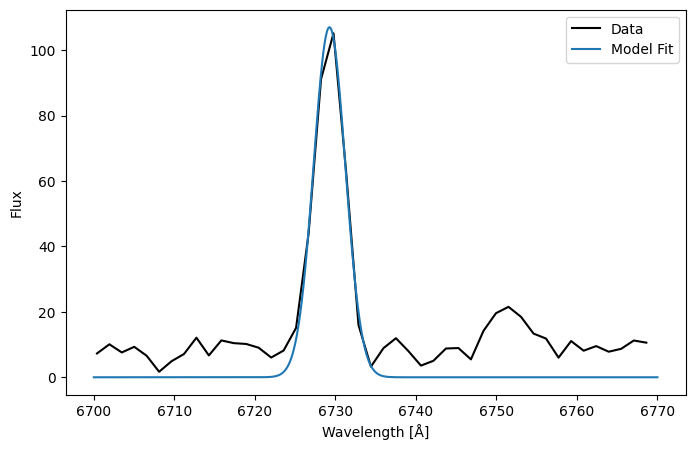

In [18]:
# 그래프 그리기
xx = np.linspace(6700, 6770, 1000)
gauss_test = gauss(xx, *popt)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(filtered_wavelength, filtered_flux, 'k-', label='Data')
ax.plot(xx, gauss_test, '-', label='Model Fit', color = 'tab:blue')
ax.set_xlabel('Wavelength [Å]')
ax.set_ylabel('Flux')
ax.legend()

plt.show()

Text(0, 0.5, 'Flux Density')

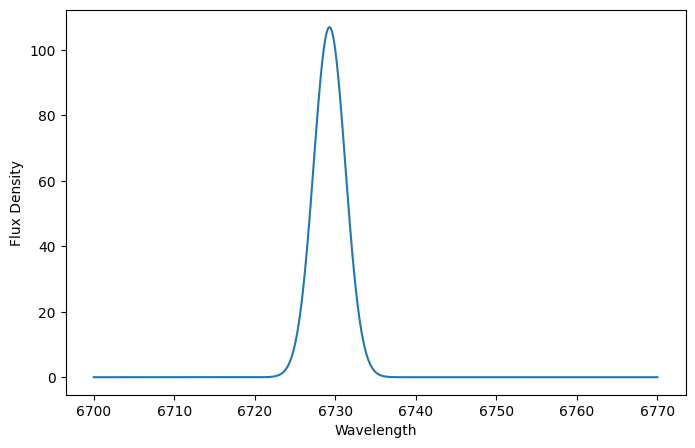

In [19]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(xx, gauss_test)
ax.set_xlabel('Wavelength')
ax.set_ylabel('Flux Density')

In [20]:
def z_from_lam(lam_emit, lam_measured):
    lam_shift = lam_measured/lam_emit
    return lam_shift -1

z_from_lam(6564, popt[1])

np.float64(0.025177325602967926)

## 7.4 Statistics

### 7.4.1 Distributions

In [21]:
from scipy.stats import multivariate_normal
import numpy as np

cov = np.array([[1,0],[0,1]])
norm = multivariate_normal(mean=[0,0],cov=cov)

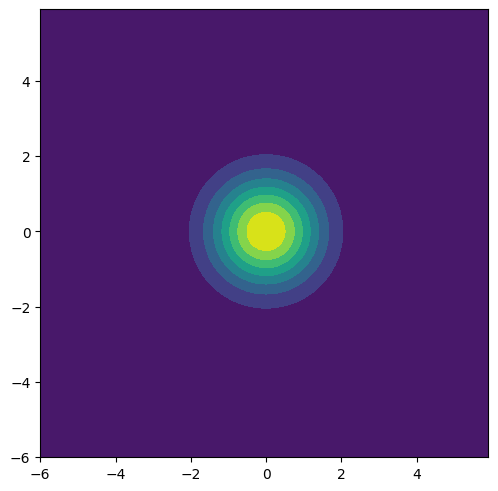

In [22]:
import matplotlib.pyplot as plt

x, y = np.mgrid[-6:6:0.1, -6:6:0.1]
pos = np.dstack((x,y))
fig, ax = plt.subplots(constrained_layout=True,)
ax.contourf(x,y,norm.pdf(pos))
ax.set_box_aspect(1)

In [23]:
norm.rvs()

array([0.75203367, 0.06964075])

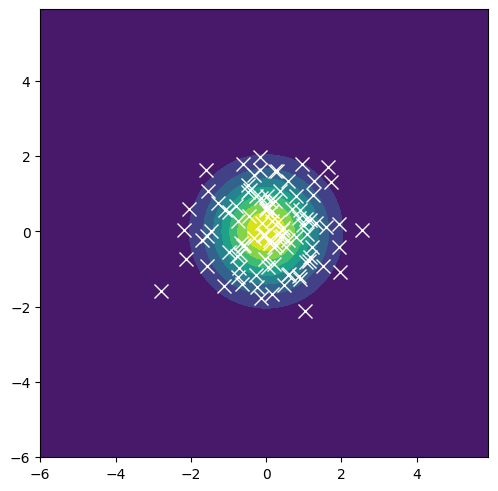

In [24]:
fig, ax = plt.subplots(constrained_layout=True,)
samples = norm.rvs(size=100)
for i in samples:
    ax.plot(i[0],i[1],'x',color='w',ms=10)

ax.contourf(x,y,norm.pdf(pos))
ax.set_box_aspect(1)
fig.savefig('scipy-stars-2.pdf')

In [25]:
from scipy.stats import norm
norm_1d = norm(loc=0,scale=1)

print(f'Prob x < 5: {norm.cdf(x=5)}')
print(f'Prob x < 2: {norm.cdf(x=2)}')
print(f'Prob x < 1: {norm.cdf(x=1)}')

Prob x < 5: 0.9999997133484281
Prob x < 2: 0.9772498680518208
Prob x < 1: 0.8413447460685429


In [26]:
(1-.68)/2 + 0.68

0.8400000000000001

## 7.5 Summary